Cell 1 – Import Library

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models

Cell 2 – Load Dataset

In [2]:
df_true = pd.read_csv("True.csv")
df_false = pd.read_csv("Fake.csv")

# Tambahkan label
df_true['label'] = 1
df_false['label'] = 0

# Gabungkan dataset
data = pd.concat([df_true, df_false], ignore_index=True)

# Tampilkan beberapa data pertama
data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


Cell 3 – Split Features & Labels

In [3]:
X = data['text']  # kolom teks
y = data['label']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Cell 4 – TF-IDF Vectorization

In [4]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vect = vectorizer.fit_transform(X_train).toarray()
X_test_vect = vectorizer.transform(X_test).toarray()


Cell 5 – Neural Network

In [5]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_vect.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/Users/dila/anaconda3/envs/newenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Cell 6 – Train Model

In [6]:
history = model.fit(
    X_train_vect, y_train, 
    epochs=10, batch_size=32, validation_split=0.2
)


Epoch 1/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9777 - loss: 0.0782 - val_accuracy: 0.9901 - val_loss: 0.0308
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9963 - loss: 0.0137 - val_accuracy: 0.9898 - val_loss: 0.0315
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9984 - loss: 0.0055 - val_accuracy: 0.9886 - val_loss: 0.0412
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9988 - loss: 0.0040 - val_accuracy: 0.9820 - val_loss: 0.0815
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9991 - loss: 0.0030 - val_accuracy: 0.9887 - val_loss: 0.0472
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9995 - loss: 0.0016 - val_accuracy: 0.9861 - val_loss: 0.0658
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9992 - loss: 0.0025 - val_accuracy: 0.9844 - val_loss: 0.0842
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9987 - loss: 0.0037 - val_accuracy: 0.

Cell 7 – Evaluation

In [7]:
loss, accuracy = model.evaluate(X_test_vect, y_test)
print("Akurasi TF-IDF NN:", accuracy)

281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.9903 - loss: 0.0462
Akurasi TF-IDF NN: 0.9903118014335632


Cell 8 – Example Prediction

In [15]:
sample_news = ["Breaking: Scientists discover new planet in our solar system!"]
sample_vect = vectorizer.transform(sample_news).toarray()
prediction = model.predict(sample_vect)
print("Prediksi (0=Fake, 1=True):", prediction[0][0])
if prediction[0][0] > 0.5:
    print("Prediksi: TRUE News ✅")
else:
    print("Prediksi: FAKE News ❌")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediksi (0=Fake, 1=True): 7.199151e-06
Prediksi: FAKE News ❌


A Comparative Study of the Most Frequent Subjects in Verified versus Fake News

1️⃣ Check columns

In [9]:
import pandas as pd

# Load dataset gabungan
df_true = pd.read_csv("True.csv")
df_false = pd.read_csv("Fake.csv")
df_true['label'] = 1
df_false['label'] = 0
data = pd.concat([df_true, df_false], ignore_index=True)

# Lihat kolom apa saja
print(data.columns)


Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')


2️⃣ If there is a 'subject' column

In [10]:
# Distribusi topik berita True
print("Distribusi topik berita True:")
print(data[data['label']==1]['subject'].value_counts())

# Distribusi topik berita Fake
print("\nDistribusi topik berita Fake:")
print(data[data['label']==0]['subject'].value_counts())


Distribusi topik berita True:
subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

Distribusi topik berita Fake:
subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64


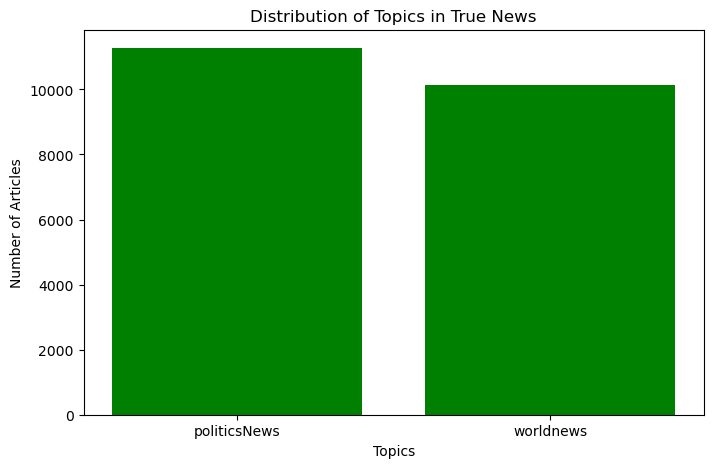

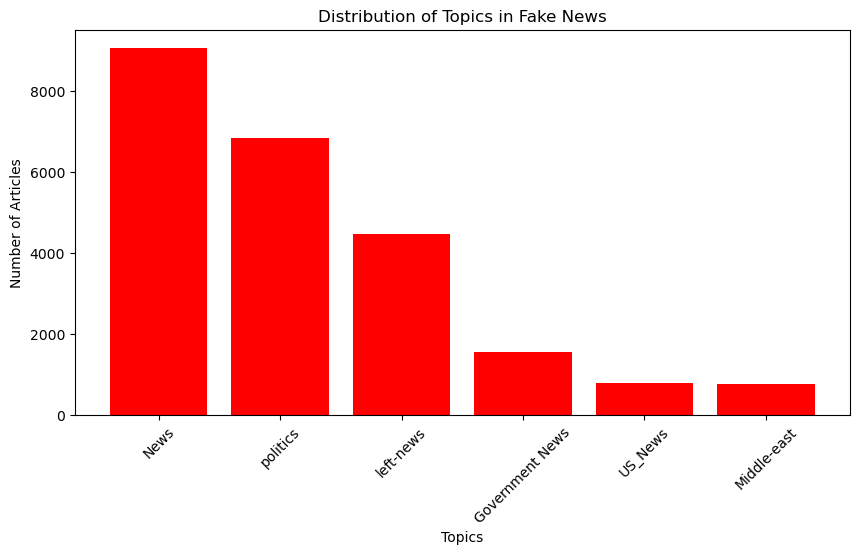

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Contoh data topik (sesuai data kamu)
true_counts = {'politicsNews': 11272, 'worldnews': 10145}
fake_counts = {'News': 9050, 'politics': 6841, 'left-news': 4459,
               'Government News': 1570, 'US_News': 783, 'Middle-east': 778}

# 1️⃣ Bar chart True News
plt.figure(figsize=(8,5))
plt.bar(true_counts.keys(), true_counts.values(), color='green')
plt.title("Distribution of Topics in True News")
plt.xlabel("Topics")
plt.ylabel("Number of Articles")
plt.show()

# 2️⃣ Bar chart Fake News
plt.figure(figsize=(10,5))
plt.bar(fake_counts.keys(), fake_counts.values(), color='red')
plt.title("Distribution of Topics in Fake News")
plt.xlabel("Topics")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.show()


3️⃣ If there is no 'subject' column, use keywords from 'title'

In [12]:
from collections import Counter
import re

def get_keywords(text_series, top_n=10):
    words = ' '.join(text_series).lower()
    words = re.findall(r'\b\w+\b', words)  # ambil kata
    counter = Counter(words)
    return counter.most_common(top_n)

# Top words in True news
print("Top words in True news:")
print(get_keywords(data[data['label']==1]['title']))

# Top words in Fake news
print("\nTop words in Fake news:")
print(get_keywords(data[data['label']==0]['title']))

Top words in True news:
[('s', 8399), ('to', 7819), ('trump', 5561), ('u', 4706), ('in', 4663), ('on', 3344), ('of', 3013), ('says', 2981), ('for', 2775), ('with', 1498)]

Top words in Fake news:
[('to', 9510), ('trump', 9338), ('video', 8477), ('s', 7712), ('the', 6306), ('of', 5168), ('for', 4833), ('in', 4718), ('a', 3786), ('on', 3688)]
